In [82]:
import matplotlib as mpl
print("matplotlib version:",mpl.__version__)
#mpl.use('MacOSX')
#['cairo', 'GTKCairo', 'gdk', 'MacOSX', 'GTK3Agg', 'Qt5Agg', 'GTKAgg', 'template', 'pdf', 'ps', 'WXAgg', 'GTK3Cairo', 'Qt4Agg', 'svg', 'WX', 'TkAgg', 'GTK', 'agg', 'WebAgg', 'pgf', 'nbAgg']
#%matplotlib inline
import pandas as pd
import math
import numpy as np
import sys
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from pylab import  text
sys.path.append('./')
fs = 16
font = {'size'   : fs}
mpl.rc('font', **font)
import seaborn as sns;

matplotlib version: 3.0.2


In [101]:
keys=['rank_tile', 'nop_tile', 'nop_thread']
keys=['init_rank_tile','rank_tile']
jobid='8790741' #st-2d-sqexp
jobid='8792157' #st-3d-sqexp
jobid='8792990' #st-3d-exp
jobids=[
    '8790741','8792157',    '8792990' #statistics
    , '8816397' #ed-2d-sin w=50
    , '8816526' #ed-2d-sin w=100
]
jobids2="8842499 8842500 8842501 8842502" # 8843686"
jobids=[s for s in jobids2.split(' ')]
#print(jobids)

8842499 ['=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=']
[****] TIME(s)    262.54857 : HiCMA_potrf	send_full_tile= 0 band= 0 lookahead= 0 HMB= 2700 PxQ=   4 4   NB= 2700 N= 1080000 : 1599340.565347 gflops



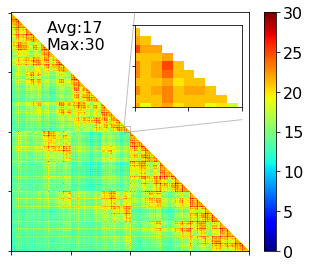

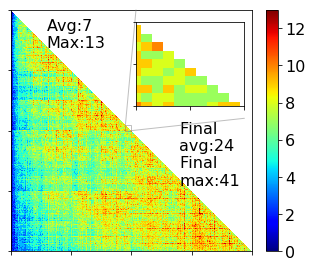

8842500 ['=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=']
[****] TIME(s)    377.44555 : HiCMA_potrf	send_full_tile= 0 band= 0 lookahead= 0 HMB= 2700 PxQ=   4 4   NB= 2700 N= 1080000 : 1112490.473739 gflops



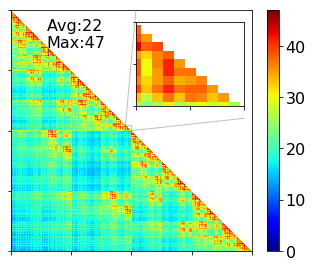

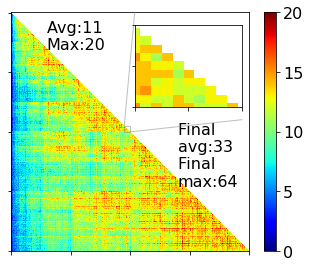

8842501 ['=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=']
[****] TIME(s)    165.74579 : HiCMA_potrf	send_full_tile= 0 band= 0 lookahead= 0 HMB= 2700 PxQ=   4 4   NB= 2700 N= 1080000 : 2533425.332783 gflops



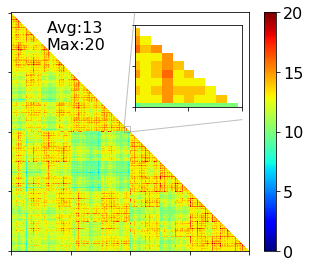

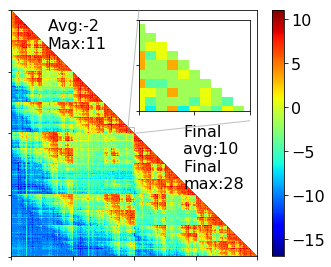

8842502 ['=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=', '=']
[****] TIME(s)    816.49500 : HiCMA_potrf	send_full_tile= 0 band= 0 lookahead= 0 HMB= 2700 PxQ=   4 4   NB= 2700 N= 1080000 :  514276.981782 gflops



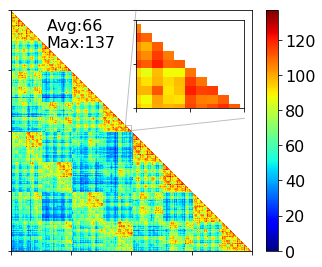

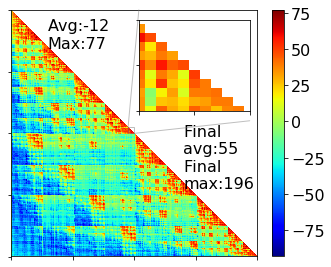

In [106]:

def parse_ranks(filename, nrows, ncols, mat, display, title, vmin=None, vmax=None, colorbar=True, lttext=None):
    mat2=mat.astype('float')
    mat2[mat2 == 0] = np.NaN
    #std = np.nanstd(mat)
    mean = np.nanmean(mat2)
    maxr = np.nanmax(mat2)
    
    info='Avg:{:.0f}'.format(mean)
    #if display is not 'diff':
    info+='\nMax:{:.0f}'.format(maxr)
    
    fig, ax = plt.subplots()#figsize=(10,10))    
    
    text(0.15, 0.9,info,
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
    
    if lttext is not None:
        text(0.7, 0.4, lttext,
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)

    if vmax is None:
        vmax = np.max(mat)
    cmap = CM.get_cmap('jet') # jet doesn't have white color
    cmap.set_bad('w')
    im=ax.imshow(mat,cmap=cmap, vmin=vmin, vmax=vmax)
    # inset axes https://matplotlib.org/gallery/subplots_axes_and_figures/zoom_inset_axes.html
    axins = ax.inset_axes([0.52, 0.55, 0.45, 0.45])
    axins.imshow(mat, cmap=cmap, vmin=0, vmax=vmax)
    # sub region of the original image
    x1, x2, y1, y2 = 190,200,200,190
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    ax.indicate_inset_zoom(axins)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #print(mat)
    if colorbar is True:
        fig.colorbar(im, fraction=0.046, pad=0.04)
    fig.tight_layout()
    if title is not None: plt.title(title)
    fig.savefig(filename+'_'+display+'.pdf', bbox_inches = 'tight');
    plt.show()
def process_file(jobid):
    fname="/Users/akbudak/shaheen/1205/akbudak/lorapo/exp/out/"+jobid
    with open(fname) as f:
        lines = f.readlines()
    start = 0
    prevstart = 0
    colorbarmax=0
    while start < len(lines):
        prevstart = start
        counts={}
        counts['init_rank_tile']=[]
        counts['rank_tile']=[]
        counts['nop_tile']=[]
        counts['nop_thread']=[]
        for key in keys:
            key_found = False
            for i, line in enumerate(lines[start:]):
                if line.startswith(key):
                    st, nrows, ncols = line.split()
                    nrows=int(nrows)
                    ncols=int(ncols)
                    #print(key, st, nrows, ncols)
                    start = start + i+1
                    key_found = True
                    break
            if key_found is False:
                break
            if key is 'rank_tile':
                print(lines[start-8])
            for i in range(0,nrows):
                line=lines[start+i]
                #print(i,line[0:10],line[-10:])
                row = [int(x) for x in line.split()]
                counts[key].append(row)
            start += i+1
            if key is 'nop_thread':
                print(lines[start+1])
            counts[key]=np.array(counts[key])
            #print(counts[key])

            if key is 'init_rank_tile' or key is 'rank_tile' or key is 'nop_tile': # or key is 'op_tile':
                mask=np.tri(counts[key].shape[0],k=0).T
                #print(mask)
                counts[key] = np.ma.array(counts[key], mask=mask)
            #if key is 'rank_tile':
            #    np.fill_diagonal(counts[key], 0)
            mat=counts[key].astype('float')
            mat[mat == 0] = np.NaN
            std = np.nanstd(mat)
            mean = np.nanmean(mat)
            maxr=np.max(mat)
            cov = std/mean
            if std  > 10000: std  /= 1e9
            if mean > 10000: mean /= 1e9
            title = key \
            +'\n mean:'+'{:.2f}'.format(mean) \
            +'\n std:'+'{:.2f}'.format(std)\
            +'\n cov:'+'{:.2f}'.format(cov)\
            +'\n maxr:'+'{:.2f}'.format(maxr)
            #print(title)
            title=None
            if colorbarmax < maxr:
                colorbarmax = maxr
            if key is 'rank_tile':
                parse_ranks(jobid, nrows, ncols, counts['init_rank_tile'], display='init_rank_tile', title=title, vmin=0, vmax=None, colorbar=True)
                #parse_ranks(jobid, nrows, ncols, counts['rank_tile'], display='rank_tile', title=title, vmin=0, vmax=colorbarmax)
                mat=counts['rank_tile']
                mat2=mat.astype('float')
                mat2[mat2 == 0] = np.NaN
                mean = np.nanmean(mat2)
                maxr = np.nanmax(mat2)
                lttext='Final\navg:{:.0f}'.format(mean)
                lttext+='\nFinal\nmax:{:.0f}'.format(maxr)
                parse_ranks(jobid, nrows, ncols, counts['rank_tile']-counts['init_rank_tile'], display='diff', title=title, lttext=lttext) #, vmax=30)

        if prevstart == start:
            break
        break
for j in jobids:
    print(j,['=' for i in range(20)])
    process_file(j)
    #break